<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/zerobase/study/%EC%8B%A4%EC%A0%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1_%EC%9C%A0%EC%A0%80_%ED%96%89%EB%8F%99_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EC%84%9C%EB%B9%84%EC%8A%A4_%EA%B1%B4%EA%B0%95%EC%84%B1_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전자제품 판매 회사의 데이터 분석가가 되어보기

실제 데이터 분석의 흐름을 따라가며, 공부해봅시다

# 데이터 살펴보기

(데이터셋 출처) https://www.kaggle.com/mkechinov/ecommerce-events-history-in-electronics-store/version/1

전자 제품 회사의 이커머스 이벤트 히스토리 (캐글)
- 2019년 10월부터 2020년 2월까지 5월까지의 큰 전자제품 온라인 상점의 5달 동안의 유저 행동 데이터를 포함하고 있다
- 각 데이터의 행은 이벤트를 나타내며, 이벤트는 상품과 유저와 관련이 있습니다
- 각 이벤트는 상품과 유저의 many-to-many relation 와 같습니다
- 하나의 세션에는 여러개의 구매 기록이 남을 수 있지만, 1개의 주문으로 봐도 좋습니다 

### 데이터 컬럼 살펴보기

- event_time: 이벤트가 일어난 시간 (UTC: 국제 표준시)
- event_type: view(상품 보기), cart(장바구니 담기), remove_from_cart(장바구니에서 제거하기), purchase (구매하기)
- product_id: 상품 ID
- category_id: 카테고리 ID
- category_code: 카테고리 코드 이름
- brand: 브랜드 이름
- price: 상품의 가격
- user_id: 유저 아이디
- user_session: 유저 세션 아이디 


### 시각화 라이브러리 불러오기

In [1]:
# 폰트 불러오는 방법

# 정보 1. colab 이 띄워진 컴퓨터는 리눅스라는 운영체제가 깔려 있습니다. Not Windows, Mac 
# 정보 2. linux 는 서버 컴퓨터 (회사의 거의 모든 소프트웨어가 떠있는 컴퓨터)로 제일 많이 사용됩니다. 
#    (윈도우와 맥은 개인용 컴퓨터에서 주로 사용됩니다. 개발자 가운데는 그래서 개인용 컴퓨터에 리눅스를 깔아 사용하는 사람들도 있습니다.)
# 정보 3. 운영체제는 GUI (그래픽을 키보드, 마우스로 조작하는 것) 과 Commandline (명령어를 통해 OS를 조작하는 것) 2가지 방법으로 조작이 가능합니다.
# 정보 4. Colab 에서 Command(명령어)를 통해 서버를 조작할 수 있는 방법은 "!"를 앞에 붙여주는 것입니다.
# 정보 5. 리눅스에서 폰트를 다운받는 방법은 다음과 같습니다: https://www.lesstif.com/lpt/linux-font-font-config-93127497.html#:~:text=fc%2Dcache%20%EB%AA%85%EB%A0%B9%EC%96%B4%EB%8A%94%20%EC%8B%9C%EC%8A%A4%ED%85%9C,%EC%BA%90%EC%8B%9C%20%EC%A0%95%EB%B3%B4%EB%A5%BC%20%EA%B0%B1%EC%8B%A0%ED%95%A9%EB%8B%88%EB%8B%A4.

# ! 리눅스 조작 명령어
# 그래서 

!sudo apt-get install -y fonts-nanum # font nanum 을 컴퓨터에 다운 받는다
!sudo fc-cache -fv # 폰트 추가 후 폰트 캐시를 재 생성하여 추가 폰트를 사용 가능하게 함
!rm ~/.cache/matplotlib -rf # matplotlib 의 캐시를 제거

# 명령어 입력후 런타임 재시작을 합니다 런타임 > 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# data 시각화 라이브러리 import 하기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Python 데이터 분석 패키지 Pandas 불러오기
import pandas as pd

### 데이터 불러오기

In [5]:
# 나의 구글 드라이브를 mount (colaboratory 노트북이 떠있는 위치에서 드라이브의 파일에 접근할 수 있게 만드는 것) 하는 명령어
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 경로 설정
# 아래에 event_log.csv 가 있는 경로를 입력하세요
DRIVE_PATH = "/content/drive/MyDrive/" # 내 드라이브의 경로이다

FILE_PATH_IN_MY_DRIVE = "zerobase_2부/Part 1. 우리 서비스에 어떤 유저가 있어요_ - 유저 데이터 분석/Project_1_실전 프로젝트 1. 유저 행동 데이터로 서비스 건강성 분석하기/data/event_log.csv" # 내 드라이브 내 파일이 있는 경로
PATH = DRIVE_PATH +  FILE_PATH_IN_MY_DRIVE

df = pd.read_csv(PATH) # csv 파일 읽어오기
df.head() # 데이터 상위 5개 불러오기

# UTC? 세계 협정시, 영국 기준

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


### 기본적인 데이터 살펴보기

In [7]:
len(df)

885129

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


- 참고: pandas data types

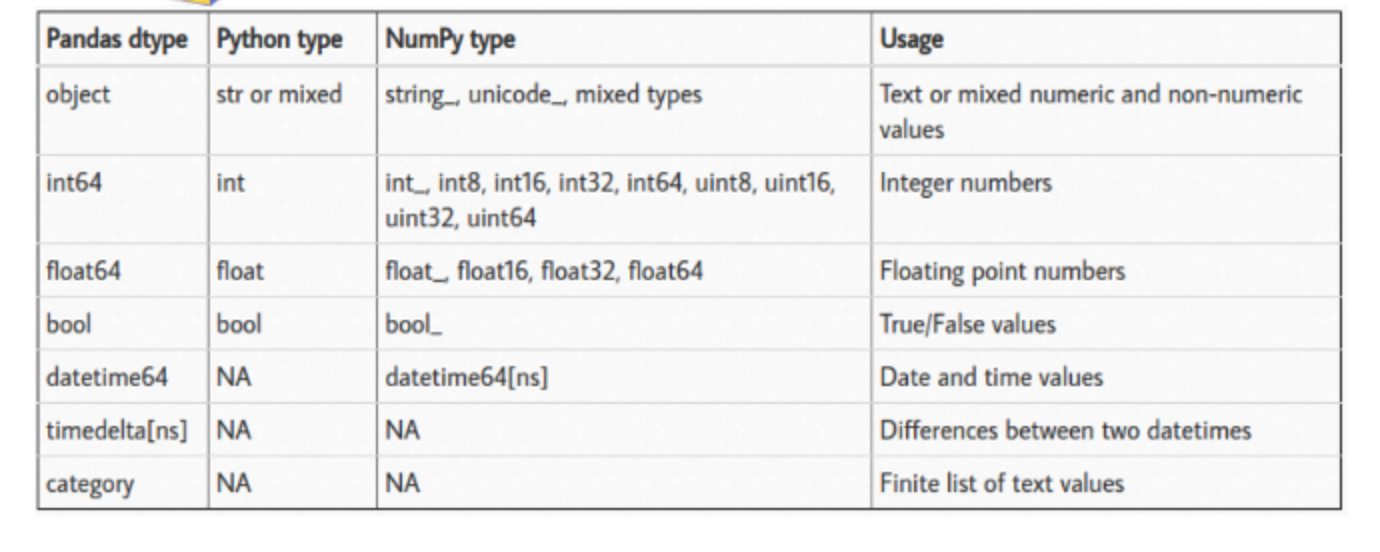

숫자형 컬럼의 중앙값과 평균 살펴보기

In [9]:
df[['price']].describe()

,price
count,885129.000000
mean,146.328713
std,296.807683
min,0.220000
25%,26.460000
50%,65.710000
75%,190.490000
max,64771.060000


In [10]:
df.min()

event_time     2020-09-24 11:57:06 UTC
event_type                        cart
product_id                         102
category_id        2144415921001726020
price                             0.22
user_id            1515915625353226922
dtype: object

In [11]:
df.max()

event_time     2021-02-28 23:59:09 UTC
event_type                        view
product_id                     4183880
category_id        2227847332769039290
price                          64771.1
user_id            1515915625611024030
dtype: object

간단히 우리가 가진 데이터를 살펴 보았다. 


---
⏰ 수업 시작

# 🌳 지표 1. Active Users

달별, 주별, 일별 시간에 따른 유저수 변화 살펴보기

* Active User 의 기준: 아래 중 1가지의 행동을 한 유저 (user_id)
  * view(상품 보기)
  * cart(장바구니 담기)
  * remove_from_cart(장바구니에서 제거하기)
  * purchase (구매하기)

## Daily Active User (기간: Daily)

In [12]:
# 날짜 전처리하기 
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format="%Y-%m-%d")

# 임의로 10월 1일부터 2월 28일간 데이터로 끊는다
df = df.loc[(df['event_date'] > '2020-09-30')]

In [13]:
# 날짜 별 unique user 수 계산하기
df_2 = df.groupby('event_date')['user_id'].nunique() 

In [14]:
dau_data = pd.DataFrame({'event_date':df_2.index, 'user_count':df_2.values})

In [15]:
dau_data.describe() 

# 2500-3300명 정도
# 5개월 (2020-10-01 - 2021-02-28) 평균 2950명이 방문한다. 중간값은 2920 이다. 

,user_count
count,151.000000
mean,2984.854305
std,472.763921
min,1370.000000
25%,2683.500000
50%,2943.000000
75%,3308.500000
max,4287.000000


Text(0, 0.5, '유저수')

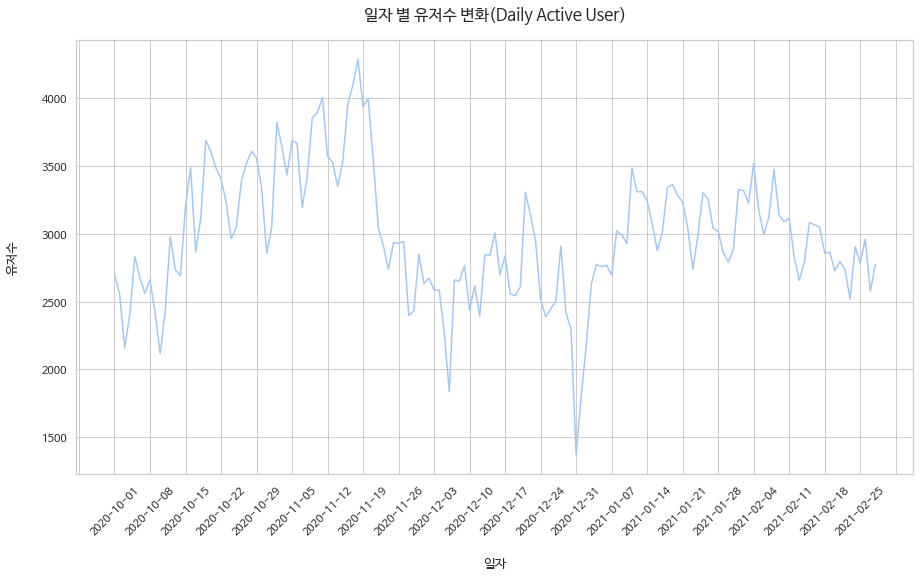

In [16]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='event_date', y='user_count', data=dau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정한다
g.set_title("일자 별 유저수 변화(Daily Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("일자",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("유저수",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.

## Weekly Active User (기간: Weekly)

In [ ]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)

# 날짜를 datatime format 으로 변경한다
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format="%Y-%m-%d")

In [18]:
# 날짜의 포맷을 %Y-w%U 연도-w주차 형태로 변경한다
df['year_week_number'] = df.event_date_dtm_format.dt.strftime('%Y-w%U')
df['year_week_number']

28074     2020-w39
28075     2020-w39
28076     2020-w39
28077     2020-w39
28078     2020-w39
            ...   
885124    2021-w09
885125    2021-w09
885126    2021-w09
885127    2021-w09
885128    2021-w09
Name: year_week_number, Length: 857055, dtype: object

In [19]:
# 주별 unique user 수 계산하기
df_2 = df.groupby('year_week_number')['user_id'].nunique() 
wau_data = pd.DataFrame({'year_week_number':df_2.index, 'user_count':df_2.values})

In [21]:
df_2.head()

year_week_number
2020-w39     7141
2020-w40    16633
2020-w41    19305
2020-w42    22179
2020-w43    21956
Name: user_id, dtype: int64

In [22]:
wau_data = pd.DataFrame({'year_week_number':df_2.index, 'user_count':df_2.values})

In [23]:
wau_data.head()

,year_week_number,user_count
0,2020-w39,7141
1,2020-w40,16633
2,2020-w41,19305
3,2020-w42,22179
4,2020-w43,21956


In [24]:
wau_data.describe() 
# 5개월 (2020-10-01 - 2021-02-28) WAU 평균 17463명이 방문한다.  

,user_count
count,24.000000
mean,17555.083333
std,5837.987920
min,2775.000000
25%,16738.000000
50%,18778.500000
75%,20581.750000
max,25600.000000


Text(0, 0.5, '유저수')

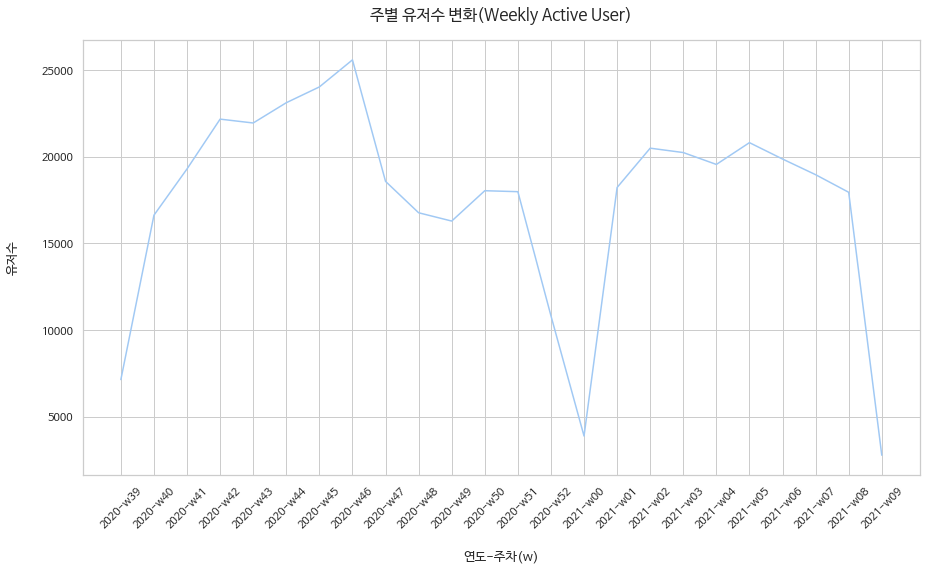

In [25]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.set_title("주별 유저수 변화(Weekly Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("연도-주차(w)",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("유저수",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.

2020-w52, 2021-w00 이 너무 낮다. 이상하다

In [26]:
# 주별 날짜를 구해본다
# 2020-w52, 2021-w00 가 각각 다른 그룹으로 할당된 것을 볼 수 있다.
# 합쳐주자
df_3 = df.groupby('year_week_number')['event_date'].nunique() 
df_3.head(100)

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [27]:
# 2021-w00 을 2020-w52로 바꾼다
# 앞의 3일, 뒤의 1일도 제거한다 (정확히 주차별 유저수만 계산하기 위해서)
OLD_YEAR_WEEK_NUMBER = "2021-w00"
NEW_YEAR_WEEK_NUMBER = "2020-w52"
df.loc[df.year_week_number == OLD_YEAR_WEEK_NUMBER, ["year_week_number"]] = NEW_YEAR_WEEK_NUMBER

df_without_week_number_count_under_7 = (
    df.loc[(df["year_week_number"] != '2020-w39'), :]
)

df_without_week_number_count_under_7 = (
    df_without_week_number_count_under_7.loc[(df_without_week_number_count_under_7["year_week_number"] != '2021-w09'), :]
)

In [28]:
df_group_by_week_number = (
    df_without_week_number_count_under_7
    .groupby('year_week_number')['user_id']
    .nunique() 
  )
wau_data = pd.DataFrame({'year_week_number':df_group_by_week_number.index, 'user_count':df_group_by_week_number.values})

In [29]:
# 아까는 5개월 (2020-10-01 - 2021-02-28) WAU 평균 17463명이 방문한다.

# 지금은 19451명으로 평균이 늘어났다 (7일 이하인 주차는 제거했기 떄문 )
wau_data.describe() 

,user_count
count,21.000000
mean,19580.047619
std,2721.335122
min,14484.000000
25%,17990.000000
50%,19305.000000
75%,20821.000000
max,25600.000000


(0.0, 28000.0)

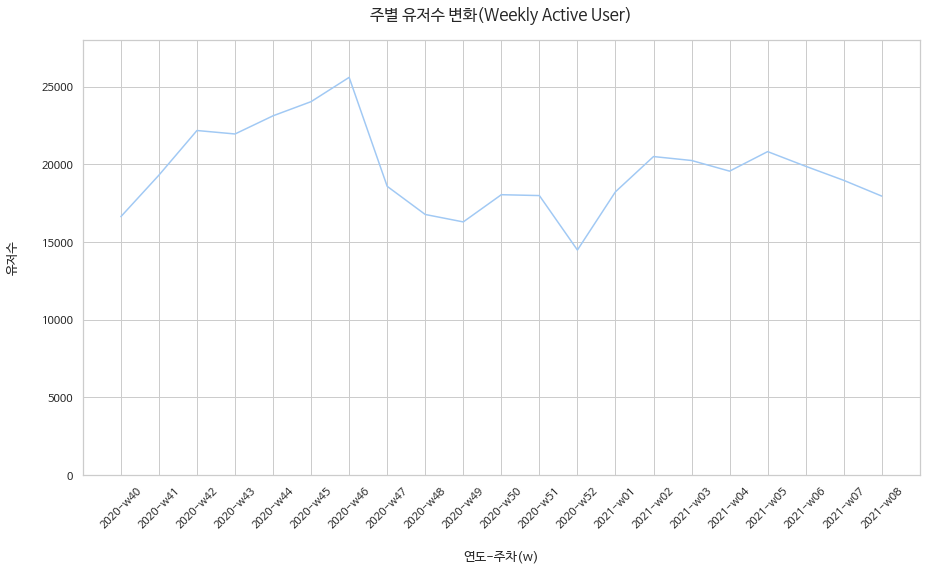

In [30]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.set_title("주별 유저수 변화(Weekly Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("연도-주차(w)",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("유저수",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.


# 추가 y축 기준을 정해줌
g.set_ylim(0, 28000)

## Monthly Active User (기간: Monthly)

In [38]:
a1 = df[['event_month']]
a2 = pd.to_datetime(a1['event_month'])
a2.dt.strftime('%y-%m')
a3 = a2.dt.strftime('%y-%m')
print(a3)
a2

28074     20-10
28075     20-10
28076     20-10
28077     20-10
28078     20-10
          ...  
885124    21-02
885125    21-02
885126    21-02
885127    21-02
885128    21-02
Name: event_month, Length: 857055, dtype: object


28074    2020-10-01
28075    2020-10-01
28076    2020-10-01
28077    2020-10-01
28078    2020-10-01
            ...    
885124   2021-02-01
885125   2021-02-01
885126   2021-02-01
885127   2021-02-01
885128   2021-02-01
Name: event_month, Length: 857055, dtype: datetime64[ns]

In [31]:
df = df.loc[(df['event_date'] > '2020-09-30')]
# 날짜 뽑기 (연도-월)
# # 1) event__time이 str(object) 일때
df['event_month'] = df['event_time'].str.slice(start=0, stop=7)

# # 2) event_time이 Datetime인 경우
# df['event_month] = df['event_time'].dt.strftime('%Y-%m')


# 날짜 별 unique user 수 계산하기
df_2 = df.groupby('event_month')['user_id'].nunique() 

# Series 를 Dataframe 으로 변환하기
mau_data = pd.DataFrame({'event_month':df_2.index, 'user_count':df_2.values})

In [ ]:
# 80963
mau_data.describe() 

,user_count
count,5.000000
mean,80963.000000
std,8130.149937
min,72137.000000
25%,74606.000000
50%,81256.000000
75%,84216.000000
max,92600.000000


Text(0, 0.5, '유저수')

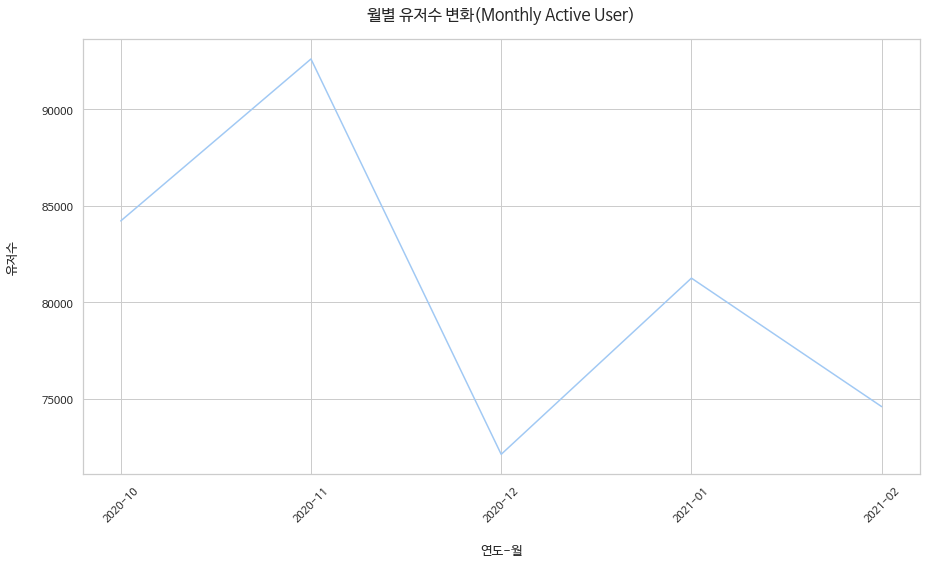

In [39]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='event_month', y='user_count', data=mau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.set_title("월별 유저수 변화(Monthly Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("연도-월",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("유저수",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.


# 아무래도 daily 가 줄어들었기 떄문에, monthly 또한 2021년에 갈수록 줄어드는 추세이다. (10, 11월이 peak!)
# 하지만 전체 데이터를 보지 않았기 때문에 seasonal effect 인지, 유저수가 감소한 것인지 완전히 단정할 수 없다
# 전자제품 쇼핑몰의 특성도 존재할 것이다.

## DAU / MAU

한 유저가 1달에 얼마나 자주 들어오는 서비스인지 판단할 수 있는 지표이다.

In [40]:
dau_data.user_count.mean()

2984.8543046357618

In [41]:
mau_data.user_count.mean()

80963.0

In [45]:
avg_daily_user = dau_data.user_count.mean()
avg_month_user = mau_data.user_count.mean()

dau_mau_ratio = avg_daily_user/avg_month_user
print(dau_mau_ratio)

print(f'dau_mau_ratio : {dau_mau_ratio:.4f}')
# 전자제품 특성상 구매주기가 길 수 있다.
# 새로 들어온 유저들이 구매하고, 1달 안에 다시 방문하는 유저들이 거의 없다.


0.03686689357651966
dau_mau_ratio : 0.0369


---
⏰ 수업 시작

# 🌴 지표 2. 유저수와 세션수

In [46]:
# 원래는 세션을 따로 정의하고 만들어야 하지만, 해당 데이터셋에는 이미 만들어져 있다.
# 보통 각 페이지 뷰 간 30분 이상 차이날 때 새 세션으로 간주한다.
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


일별 세션수를 구해보자

In [ ]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format="%Y-%m-%d")

In [ ]:
# 날짜 별 unique user 수 계산하기
df_unique_user_and_session = (
    df.loc[:, ['user_id', 'user_session', 'event_time','event_date']]
      .groupby('event_date')
      .agg(['nunique', 'count'])
)

In [ ]:
df_unique_user_and_session.sort_values('event_date').head(5)

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982

In [ ]:
# ('user_id', 'nunique') : 유저 수
# ('user_session', 'nunique') : 세션 수
# ('event_time', 'count') : 이벤트 수 (클릭수)
df_unique_user_and_session.sort_values('event_date').columns

MultiIndex([(     'user_id', 'nunique'),
            (     'user_id',   'count'),
            ('user_session', 'nunique'),
            ('user_session',   'count'),
            (  'event_time', 'nunique'),
            (  'event_time',   'count')],
           )

In [ ]:
# 일별 유저수, 세션수, 이벤트 수 차이
agg = df_unique_user_and_session.sort_values('event_date')
user_session_agg_df = pd.DataFrame(
    {
        'user_count': agg[('user_id', 'nunique')],
        'session_count': agg[('user_session', 'nunique')],
        'event_count': agg[(  'event_time',   'count')],
    }
)
user_session_agg_df.head(5)

,user_count,session_count,event_count
event_date,,,
2020-10-01,2699,2847,4657
2020-10-02,2559,2728,4555
2020-10-03,2162,2271,3774
2020-10-04,2398,2529,4413
2020-10-05,2832,3002,4982


In [ ]:
# 유저 별 일일 세션수
user_session_agg_df['session_per_user'] = user_session_agg_df['session_count'] / user_session_agg_df['user_count']

# 세션 별 이벤트 클릭 수
user_session_agg_df['clicks_per_session'] = user_session_agg_df['event_count'] / user_session_agg_df['session_count']

In [ ]:
user_session_agg_df.head()

,user_count,session_count,event_count,session_per_user,clicks_per_session
event_date,,,,,
2020-10-01,2699,2847,4657,1.054835,1.635757
2020-10-02,2559,2728,4555,1.066041,1.669721
2020-10-03,2162,2271,3774,1.050416,1.661823
2020-10-04,2398,2529,4413,1.054629,1.744958
2020-10-05,2832,3002,4982,1.060028,1.659560


In [ ]:
# 세션 및 클릭 그려보기. 2개를 어떻게 하나의 차트에 그리지?

In [ ]:
# sns.lineplot(x='event_date', y=['session_per_user', 'clicks_per_session'], data=user_session_agg_df) # line 차트 그래프를 그린다

In [ ]:
# Wide to Long Format
melted_df = pd.melt(
          user_session_agg_df.reset_index(), 
          id_vars=['event_date'], 
          value_vars=['session_per_user', 
                      'clicks_per_session']
)
melted_df.head()

,event_date,variable,value
0,2020-10-01,session_per_user,1.054835
1,2020-10-02,session_per_user,1.066041
2,2020-10-03,session_per_user,1.050416
3,2020-10-04,session_per_user,1.054629
4,2020-10-05,session_per_user,1.060028


Text(0, 0.5, 'variable')

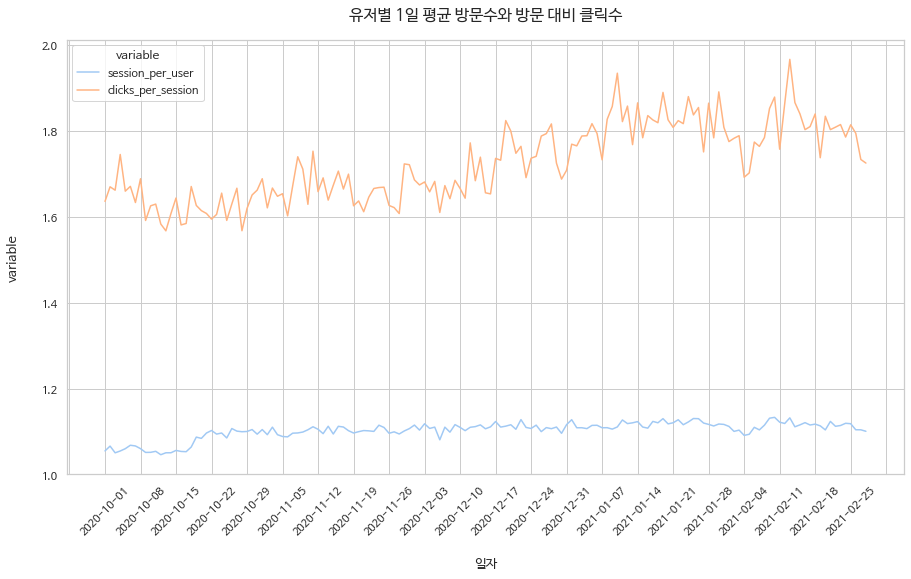

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='event_date', y='value', hue='variable', data=melted_df)# line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정한다
g.set_title("유저별 1일 평균 방문수와 방문 대비 클릭수", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("일자",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("variable",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.

---
⏰ 수업 시작

 # ⚽️ 지표 3. 코호트 분석 

In [ ]:
import pandas as pd 

In [ ]:
len(df)

857055

In [ ]:
# 'O' (Python) objects
# 문자열을 의미합니다.
df.event_time.dtypes

dtype('O')

In [ ]:
# event time type을 string에서 datetime으로 바꾸기 
# 날짜 관련 유용한 함수들을 쓰기 위함
df['event_time'] = pd.to_datetime(df['event_time'], 
                                       format='%Y-%m-%d %H:%M:%S %Z')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


In [ ]:
# data type 을 확인해보면 아래와 같다.
df.event_time.dtypes

datetime64[ns, UTC]

In [ ]:
# 구매 연도-월 형태의 필드를 생성합니다.
df['order_month']=df['event_time'].dt.strftime('%Y-%m')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
# event_type 이 구매인 경우만 필터링 합니다
order_data = df.loc[df.event_type == "purchase"]
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
28089,2020-10-01 00:16:49+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28094,2020-10-01 00:21:18+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28104,2020-10-01 00:31:26+00:00,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28117,2020-10-01 00:39:19+00:00,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28118,2020-10-01 00:39:19+00:00,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
# index 를 user_id 로 설정합니다. 
# 나중에 join을 index 를 기준으로 할 예정입니다.
order_data.set_index('user_id',inplace=True)
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
user_id,,,,,,,,,,,,,
1515915625521279407,2020-10-01 00:16:49+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521279407,2020-10-01 00:21:18+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521280982,2020-10-01 00:31:26+00:00,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19+00:00,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19+00:00,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [ ]:
# 연도-월 형태의 필드를 생성합니다.
df['year_month']=df['event_time'].dt.strftime('%Y-%m')
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,year_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10


In [ ]:
# 유저 별 첫번째 구매월을 추출합니다.
# group by: user_id 별로 order_month 가 제일 작은 경우
first_order = order_data.groupby(order_data.index)['order_month'].min()
first_order.head()

user_id
1515915625353286099    2020-10
1515915625353534622    2020-10
1515915625353561691    2020-11
1515915625353900095    2020-10
1515915625354561351    2020-10
Name: order_month, dtype: object

In [ ]:
# 기존 order_data 에 첫번째 구매월에 대한 정보를 추가합니다 
order_data = order_data.merge(
    first_order.rename("first_order_month").to_frame(), 
    left_index=True, 
    right_index=True
)
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,first_order_month
user_id,,,,,,,,,,,,,,
1515915625353286099,2020-10-03 11:23:44+00:00,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:01:55+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:03:42+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:29:25+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353561691,2020-11-24 17:37:22+00:00,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11


In [ ]:
# index 를 다시 해제합니다
# inplace=True 는 기존 데이터에 변화를 반영하겠다는 의미입니다 
order_data.reset_index(inplace=True)
order_data.head()

,user_id,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,first_order_month
0,1515915625353286099,2020-10-03 11:23:44+00:00,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1,1515915625353534622,2020-10-06 10:01:55+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
2,1515915625353534622,2020-10-06 10:03:42+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
3,1515915625353534622,2020-10-06 10:29:25+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
4,1515915625353561691,2020-11-24 17:37:22+00:00,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11


In [ ]:
grouped = order_data.groupby(['first_order_month', 'order_month'])

In [ ]:
# 첫 구매월 별로 다음 달의 구매건수 변화
cohorts=grouped['user_id'].nunique()
cohorts.head(50)

first_order_month  order_month
2020-10            2020-10        3796
                   2020-11          67
                   2020-12          17
                   2021-01           4
                   2021-02           4
2020-11            2020-11        4261
                   2020-12          68
                   2021-01          26
                   2021-02           7
2020-12            2020-12        3784
                   2021-01          68
                   2021-02          21
2021-01            2021-01        4673
                   2021-02         117
2021-02            2021-02        4192
Name: user_id, dtype: int64

In [ ]:
cohorts=cohorts.reset_index()
cohorts.head()

,first_order_month,order_month,user_id
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [ ]:
# 필드 user_id 의 이름을 total_user 로 변경합니다
cohorts.rename({'user_id':'total_users'}, axis=1, inplace=True)
cohorts.head()

,first_order_month,order_month,total_users
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [ ]:
# 각 첫 구매월 별로 구매월이 잘 분포되어 있는지 확인합니다.
each_period=cohorts['first_order_month'].value_counts().sort_index()
each_period

2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_order_month, dtype: int64

In [ ]:
cohorts.first_order_month.dtypes

dtype('O')

In [ ]:
# 코호트 분석을 위해, 첫 구매월과 구매월의 차이를 계산합니다.
# 기존 함수를 이용하기 위해, string 을 datetime으로 바꾸고 to_period 함수를 사용합니다.

cohorts["first_order_month_dt"] = pd.to_datetime(cohorts.first_order_month, format='%Y-%m')
cohorts["order_month_dt"] = pd.to_datetime(cohorts.order_month, format='%Y-%m')

In [ ]:
# 코호트 분석을 위해, 첫 구매월과 구매월의 차이를 계산합니다.
# 기존 함수를 이용하기 위해, string 을 datetime으로 바꾸고 to_period 함수를 사용합니다.

cohorts["first_order_month_dt"] = pd.to_datetime(cohorts.first_order_month, format='%Y-%m')
cohorts["order_month_dt"] = pd.to_datetime(cohorts.order_month, format='%Y-%m')

In [ ]:
cohorts.first_order_month_dt.dtypes

dtype('<M8[ns]')

In [ ]:
# period 객체로 바꿉니다
# # https://pandas.pydata.org/docs/reference/api/pandas.Period.html
cohorts.order_month_dt.dt.to_period('M')

0     2020-10
1     2020-11
2     2020-12
3     2021-01
4     2021-02
5     2020-11
6     2020-12
7     2021-01
8     2021-02
9     2020-12
10    2021-01
11    2021-02
12    2021-01
13    2021-02
14    2021-02
Name: order_month_dt, dtype: period[M]

In [ ]:
# integer 로 변경
cohorts.order_month_dt.dt.to_period('M').astype(int)

0     609
1     610
2     611
3     612
4     613
5     610
6     611
7     612
8     613
9     611
10    612
11    613
12    612
13    613
14    613
Name: order_month_dt, dtype: int64

In [ ]:
 cohorts['month_diff'] = (
     cohorts.order_month_dt.dt.to_period('M').astype(int) 
     - cohorts.first_order_month_dt.dt.to_period('M').astype(int)
)

In [ ]:
cohorts.head()

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt,month_diff
0,2020-10,2020-10,3796,2020-10-01,2020-10-01,0
1,2020-10,2020-11,67,2020-10-01,2020-11-01,1
2,2020-10,2020-12,17,2020-10-01,2020-12-01,2
3,2020-10,2021-01,4,2020-10-01,2021-01-01,3
4,2020-10,2021-02,4,2020-10-01,2021-02-01,4


In [ ]:
cohorts = cohorts[['first_order_month','month_diff','total_users']]
cohorts.set_index(['first_order_month','month_diff'],inplace=True)
cohorts.head()

total_users
first_order_month month_diff             
2020-10           0                  3796
                  1                    67
                  2                    17
                  3                     4
                  4                     4

In [ ]:
cohorts = cohorts['total_users'].unstack(1)
cohorts

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,3796.0,67.0,17.0,4.0,4.0
2020-11,4261.0,68.0,26.0,7.0,NaN
2020-12,3784.0,68.0,21.0,NaN,NaN
2021-01,4673.0,117.0,NaN,NaN,NaN
2021-02,4192.0,NaN,NaN,NaN,NaN


In [ ]:
# 재구매율로 표현하기
reorder_rate=cohorts.divide(cohorts[0],axis=0)
reorder_rate

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,1.0,0.017650,0.004478,0.001054,0.001054
2020-11,1.0,0.015959,0.006102,0.001643,NaN
2020-12,1.0,0.017970,0.005550,NaN,NaN
2021-01,1.0,0.025037,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


In [ ]:
reorder_rate.iloc[:, 1:]

month_diff,1,2,3,4
first_order_month,,,,
2020-10,0.017650,0.004478,0.001054,0.001054
2020-11,0.015959,0.006102,0.001643,NaN
2020-12,0.017970,0.005550,NaN,NaN
2021-01,0.025037,NaN,NaN,NaN
2021-02,NaN,NaN,NaN,NaN


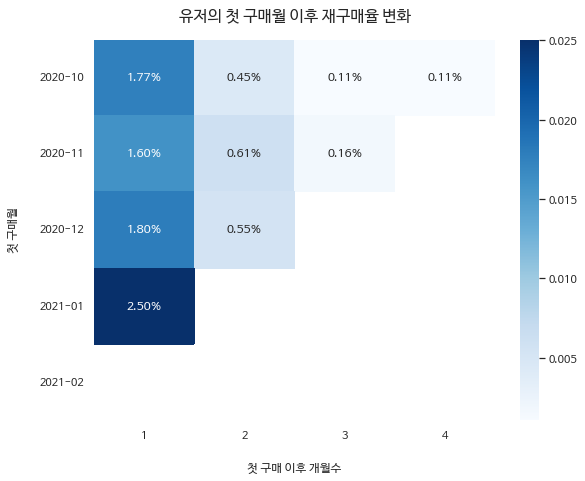

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다


g = sns.heatmap(reorder_rate.iloc[:, 1:], annot=True, fmt='.2%', cmap="Blues")

g.figure.set_size_inches(9, 7) # 그래프의 크기를 키운다
g.set_title("유저의 첫 구매월 이후 재구매율 변화", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.
g.set_xlabel("첫 구매 이후 개월수",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("첫 구매월",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다


재방문율로 cohort 그래프 그려보기

In [ ]:
# 연도-월 형태의 필드를 생성합니다.
df['year_month']=df['event_time'].dt.strftime('%Y-%m')
df.head()

# 방문은 어떤 이벤트라도 발생하면 방문으로 정의합니다.
visit_data = df[['event_time', 'user_id', 'user_session', 'year_month']]
visit_data.set_index('user_id',inplace=True)
visit_data.head()

,event_time,user_session,year_month
user_id,,,
1515915625520113390,2020-10-01 00:01:36+00:00,4X2NwIInsI,2020-10
1515915625521278799,2020-10-01 00:04:11+00:00,daM8ubpOfo,2020-10
1515915625521278938,2020-10-01 00:07:23+00:00,EdgYsorbdC,2020-10
1515915625520113390,2020-10-01 00:07:56+00:00,4X2NwIInsI,2020-10
1515915625521279091,2020-10-01 00:08:11+00:00,Et4GWStGMB,2020-10


In [ ]:
# 유저 별 첫번째 방문월을 추출합니다.
first_visit = visit_data.groupby(visit_data.index)['year_month'].min()
first_visit.head()

# 기존 visit_data 에 첫번째 방문월에 대한 정보를 추가합니다 
visit_data = visit_data.merge(
    first_visit.rename("first_visit_month").to_frame(), 
    left_index=True, 
    right_index=True
)
visit_data.head()

# index 를 다시 해제합니다
# inplace=True 는 기존 데이터에 변화를 반영하겠다는 의미입니다 
visit_data.reset_index(inplace=True)
visit_data.head()

visit_grouped = visit_data.groupby(['first_visit_month', 'year_month'])


# 첫 방문월 별로 다음 달의 구매건수 변화
visit_cohorts=visit_grouped['user_id'].nunique()
visit_cohorts.head(50)

first_visit_month  year_month
2020-10            2020-10       84216
                   2020-11        2387
                   2020-12         758
                   2021-01         504
                   2021-02         322
2020-11            2020-11       90213
                   2020-12        1879
                   2021-01         798
                   2021-02         557
2020-12            2020-12       69500
                   2021-01        1648
                   2021-02         716
2021-01            2021-01       78306
                   2021-02        2166
2021-02            2021-02       70845
Name: user_id, dtype: int64

In [ ]:
visit_cohorts=visit_cohorts.reset_index()
visit_cohorts.head()

# 방문월이 9월인 경우는 제거 (한달의 길이가 불충분하기 때문)
visit_cohorts = visit_cohorts.loc[visit_cohorts.first_visit_month > '2020-09', :]


# 필드 user_id 의 이름을 total_user 로 변경합니다
visit_cohorts.rename({'user_id':'total_users'}, axis=1, inplace=True)
visit_cohorts.head()

# 각 첫 방문월 별로 월 수기 잘 분포되어 있는지 확인합니다.
each_period=visit_cohorts['first_visit_month'].value_counts().sort_index()
each_period


2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_visit_month, dtype: int64

In [ ]:

# 코호트 분석을 위해, 첫 방문월과 방문월의 차이를 계산합니다.
# 기존 함수를 이용하기 위해, string 을 datetime으로 바꾸고 to_period 함수를 사용합니다.

visit_cohorts["first_visit_month_dt"] = pd.to_datetime(visit_cohorts.first_visit_month, format='%Y-%m')
visit_cohorts["visit_month_dt"] = pd.to_datetime(visit_cohorts.year_month, format='%Y-%m')

visit_cohorts['month_diff'] = (
     visit_cohorts.visit_month_dt.dt.to_period('M').astype(int) 
     - visit_cohorts.first_visit_month_dt.dt.to_period('M').astype(int)
)
 
visit_cohorts.head()


,first_visit_month,year_month,total_users,first_visit_month_dt,visit_month_dt,month_diff
0,2020-10,2020-10,84216,2020-10-01,2020-10-01,0
1,2020-10,2020-11,2387,2020-10-01,2020-11-01,1
2,2020-10,2020-12,758,2020-10-01,2020-12-01,2
3,2020-10,2021-01,504,2020-10-01,2021-01-01,3
4,2020-10,2021-02,322,2020-10-01,2021-02-01,4


In [ ]:

visit_cohorts = visit_cohorts[['first_visit_month','month_diff','total_users']]
visit_cohorts.set_index(['first_visit_month','month_diff'],inplace=True)
visit_cohorts.head()



total_users
first_visit_month month_diff             
2020-10           0                 84216
                  1                  2387
                  2                   758
                  3                   504
                  4                   322

In [ ]:
visit_cohorts = visit_cohorts['total_users'].unstack(1)
visit_cohorts

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,84216.0,2387.0,758.0,504.0,322.0
2020-11,90213.0,1879.0,798.0,557.0,NaN
2020-12,69500.0,1648.0,716.0,NaN,NaN
2021-01,78306.0,2166.0,NaN,NaN,NaN
2021-02,70845.0,NaN,NaN,NaN,NaN


In [ ]:
# 재방문율로 표현하기
revisit_rate=visit_cohorts.divide(visit_cohorts[0],axis=0)
revisit_rate

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,1.0,0.028344,0.009001,0.005985,0.003824
2020-11,1.0,0.020828,0.008846,0.006174,NaN
2020-12,1.0,0.023712,0.010302,NaN,NaN
2021-01,1.0,0.027661,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


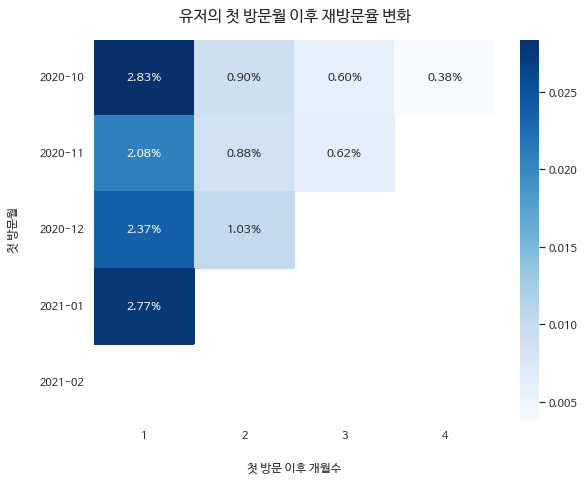

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다


g = sns.heatmap(revisit_rate.iloc[:, 1:], annot=True, fmt='.2%', cmap="Blues")

g.figure.set_size_inches(9, 7) # 그래프의 크기를 키운다
g.set_title("유저의 첫 방문월 이후 재방문율 변화", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.
g.set_xlabel("첫 방문 이후 개월수",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("첫 방문월",labelpad = 20, size = 12) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다

# 🥁 간단한 데이터 분석 보고서 만들어보기

In [ ]:
# 노션 보고서 문서: https://www.notion.so/d49b6f93c8824cc7a1d780d7a93d40b9